# practice - torch sklearn numpy
sklearn, numpy for linear regression and gradient descent

[kaggle House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)에서 가져온 데이터를 이용하여, Linear Regression을 구현해보자.

우리의 SalesPrice가 구하기를 원하는 y이고 이것은 연속적인(continuous)한 value이기 때문에 linear regression을 사용하는 과제라고 볼 수 있다. GriLivArea(Above grade(ground) living area square feet)은 cs229에서 말하는 size(feet^2)와 가장 유사한 column이라고 생각되어서 뽑았다. 단순하게 scatter plot을 해봐도 사이드로 많이 빠진 몇 outlier들을 제외하면 어느 정도의 linear 관계를 볼 수 있을 거라고 생각된다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

train = pd.read_csv('./files/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

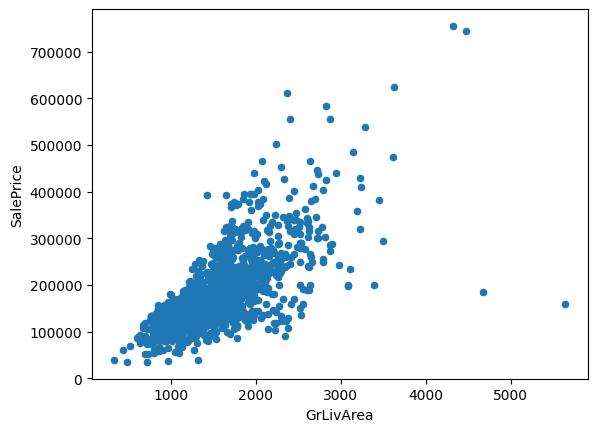

In [2]:
train[['SalePrice','GrLivArea']].plot.scatter(x='GrLivArea', y='SalePrice')

## standardization

\begin{equation*}
z = \frac{x - \mu}{\sigma}
\end{equation*}

- $\mu$는 평균, $\sigma$는 표준편차
- $z$는 표준화된 값으로, 평균으로부터 얼마나 떨어져 있으며, 그 거리를 표준편차의 몇 배수만큼 떨어져 있는지를 나타낸다.
- 데이터를 평균이 0이고, 표준편차가 1인 값으로 변환하는 것.
- 데이터의 범위를 일정하게 조정하고, 다양한 스케일을 가진 변수들간 비교 가능하도록 만듦.
- outlier에 영향을 받을 수 있기 때문에 데이터의 분포에 따라 (가우시안 normal distribution이 아닐 경우) 다른 scaler를 사용해야 할 수 있다.
- 입력변수 X를 standardization 하지 않고 학습할 경우에 가중치의 값이 제대로 학습되지 않을 수 있다. 스케일이 다르기 때문에.

In [3]:
X = train['GrLivArea'].values.reshape(-1,1)
y = train['SalePrice'].values.reshape(-1,1)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

## Sklearn linear regression

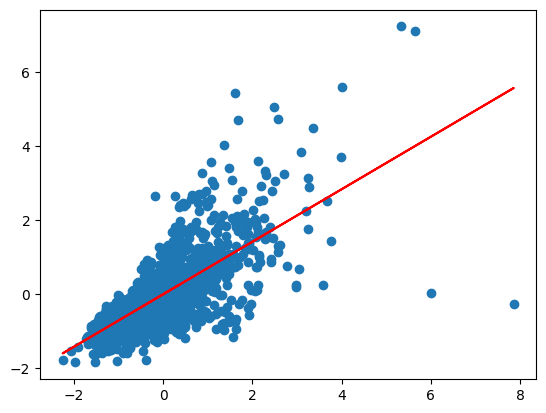

$h(\Theta)$ = 0.71x + 0.00

In [4]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# print("$h(\Theta)$" f"= {lr.coef_[0][0]:.2f}x + {lr.intercept_[0]:.2f}")
result_str =  r"$h(\Theta)$ = {:.2f}x + {:.2f}".format(lr.coef_[0][0], lr.intercept_[0])
display(Markdown(result_str))

## Numpy implementation

In [5]:
lr = 1e-1
n_epochs = 5000
a = np.random.randn(1)
b = np.random.randn(1)

for epoch in range(n_epochs):
    y_hat = a + b * X
    error = y - y_hat
    loss = (error**2).mean()

    a_grad = -2 *error.mean()
    b_grad = -2 * (X * error).mean()

    a = a - lr * a_grad
    b = b - lr * b_grad
    
result_str =  r"$h(\Theta)$ = {:.2f}x + {:.2f}".format(b[0], a[0])
display(Markdown(result_str))

$h(\Theta)$ = 0.71x + 0.00

## manim test

In [7]:
# from manim import *
# from manim import config; config.media_embed=True
# %%manim -v WARNING  --progress_bar None -r 400,200 --format=gif --disable_caching HelloManim

# class HelloManim(Scene):
#     def construct(self):
#         self.camera.background_color = "#ece6e2"
#         banner_large = ManimBanner(dark_theme=False).scale(0.7)
#         self.play(banner_large.create())
#         self.play(banner_large.expand())

```{raw} html
<script
   type="text/javascript"
   src="https://utteranc.es/client.js"
   async="async"
   repo="surdarla/surdarla.github.io"
   issue-term="pathname"
   theme="github-light"
   label="💬 comment"
   crossorigin="anonymous"
/>
```